# Bayesian vs Frequentist Estimation
## Introduction
In statistics, there are two major paradigms for parameter estimation: the Frequentist and the Bayesian approaches. Although both aim to infer information about an unknown parameter $\theta$ from observed data, their philosophies differ fundamentally:
+ Frequentist view: The parameter $\theta$ is fixed but unknown. Probability describes the frequency of data outcomes under repeated sampling.
+ Bayesian view: The parameter  $\theta$ itself is treated as a random variable. Probability describes uncertainty about $\theta$, updated as new data become available.

This is: Frequentists estimate a single best $\hat{\theta}$, whereas Bayesians derive a full posterior distribution over $\theta$.

To illustrate these perspectives, consider a simple coin-tossing experiment modeled as a Bernoulli process.

## The coin toss

Consider a coin flip. Let's say that if *tails* comes up we will consider the random variable $X$ as $0$ and, by consequence, if result in *heads* the variable will be *1*.

Considering $\theta \in [0 , 1]$ the probability of the coin flip results in *head* and $X$ as a Bernoulli Random Variable, then the probability density of $X$ will be:
$$ p(x|\theta) = \theta^{x} (1 - \theta)^{1-x} $$

## The experiments

Suppose that we perform $n$ random independents experiments on the same coin. So,
$$ x = (X_1, X_2, ..., X_n)$$

Note that $x \in \mathbb{R}^n$ and $X_i$ is the result of the $i$th coin flip, for $i \in [1, n]$.

Then, for $n$ experiments, the probability density of $x$ will be given by:

$$ p(x|\theta) = p(x_1, x_2, ..., x_n| \theta) = \prod^{n}_{i = 1} \theta^{x_i} (1 - \theta)^{1-x_i} $$

## The frequentist - Maximum Likelihood

The main idea of the Maximum Likelihood estimation is to find the estimator of $\theta$, $\hat{\theta}_{ML}$, that maximizes the Likelihood function:
$$ \mathcal{L}(\theta) := \mathcal{L}(\theta|x) := p(x|\theta) $$ 

For $p(x|\theta)$ given above, the $\hat{\theta}_{ML}$ will be:
$$\hat{\theta}_{ML} = \frac{\sum x_i}{n} $$

Also, this estimator is **unbiased**, i.e., $\mathbb{E}[\hat{\theta}_{ML}] = \theta$. And the variance is $Var[\hat{\theta}_{ML}] = \frac{1}{n} \theta (1 - \theta)$.

## The bayesian - Prior and Posterior

In Bayesian statistics, we begin with an initial belief about the parameters—called the **prior distribution** — and update this belief as we collect data, resulting in the **posterior distribution**. This process allows us to refine our understanding as new evidence becomes available.

+ Prior distribution $p(\theta)$:
The prior distribution represents our initial assumptions or beliefs about the parameters before observing any data. It summarizes what is known (or assumed) about the parameters a priori and is expressed as a probability density function (PDF).

+ Posterior distribution $p(\theta|x)$:
The posterior distribution represents our updated belief about the parameters after incorporating the observed data $x$. It combines the prior distribution with the likelihood of the data, resulting in a revised probability density function that reflects both prior knowledge and new evidence.

Now, since we are talking about probabilities, we can observe that $\theta$, our interest focus, is bounded and belong to the interval $[0, 1]$.  However, we do not have any clue of $\theta$'s value. When we don't have any idea of how is the probability distribution function, we call this as *uninformative prior*.

So, it's ok to suppose that every possible value of $\theta \in [0,1]$ has the same chance. Then, we can say that our prior will be uniformly distributed in this interval, i.e., $\theta \thicksim \mathcal{U}(a = 0, b = 1)$. The PDF of this distribution is given by:
$$ p(\theta) = \frac{1}{b - a}$$

By Bayes' Theorem, we have that:
$$ p(\theta|x) = \frac{p(\theta)p(x|\theta)}{p(x)} $$

In this equation, we have in the numerator, $p(\theta)$ - our *prior* - and $p(x|\theta)$ - the *Likelihood* function. So, we can say that the *posterior* - is proportional to the product of the prior and the likelihood function. 

$$ p(\theta|x) \propto p(\theta)p(x|\theta) $$

But, what's the difference from the PDF of the Bernoulli distribution above?

In the frequentist case, the function's - $p(x|\theta)$ - argument was $x$, and now the *posterior* function -  $p(\theta|x)$ - argument is $\theta$. Then, if we rewrite the posterior relation that we have replacing the prior with the uniform distribution, we have:

$$ p(\theta|x) \propto \mathcal{U}(a = 0, b = 1)p(x|\theta) = \frac{1}{b - a}p(x|\theta)$$

Thus,

$$ p(\theta|x) \propto \frac{1}{B(a, b)} \theta^{a-1}(1-\theta)^{b-1} $$

and, this is exactly the shape of the $Beta(\theta|\alpha, \beta)$ distribution.

### Let's now have a python example for both cases

In [3]:
# First calling the modules
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import pandas as pd

Here we are going to say that $\theta = 70\%$. This means that every coin flip has the probability of returning **head** equals $70\%$.

In [4]:
# Let's say that the real probability of 1 coin flip return HEAD is 70%
real_theta = 0.7

Our next assumption will be that every sample will have $n = 10$ tries. This means, we will flip the coin $10$ times and then estimate $\theta$. We will repeat this experiment many times and compute the bias and the variance.

In [5]:
# lenght of one experiment (# of coin tosses per experiment)
n = 10

In [15]:
# number of samples
qnt_samples = [10 ** i for i in range(1, 7)]

for i in qnt_samples:
    experiment = np.random.binomial(n, real_theta, size = i)/n # Computing the binomial (bernoulli) experiment
    
    estimated_theta = np.mean(experiment)# above we discussed that the estimated theta was the (number of heads/number of tosses)
    bias_estimated_theta = estimated_theta - real_theta # computing the bias
    variance_estimated_theta = np.sum((experiment - np.mean(experiment)) ** 2) / (i - 1) # Computing var

    variance_real_theta = (real_theta * (1 - real_theta))/n

    print("{:8} {:16.4f} {: 12.2e} {:16.4f} {:14.4f}".format(i, estimated_theta, bias_estimated_theta, variance_estimated_theta, variance_real_theta)) 

      10           0.6900    -1.00e-02           0.0277         0.0210
     100           0.7140     1.40e-02           0.0178         0.0210
    1000           0.6978    -2.20e-03           0.0200         0.0210
   10000           0.6962    -3.81e-03           0.0213         0.0210
  100000           0.7000     3.70e-05           0.0211         0.0210
 1000000           0.7000     1.59e-05           0.0210         0.0210


Note that basically, after every experiment, the maximum likelihood estimator gives us a value close to the real probability, which is $70\%$.

#### Now let's look for the bayesian case

First, let's supose that we tossed the coin $10$ times and it gives $7$ heads. Then, we have the following results.

posterior mean: 0.7
posterior s.d.: 0.13816985594155148


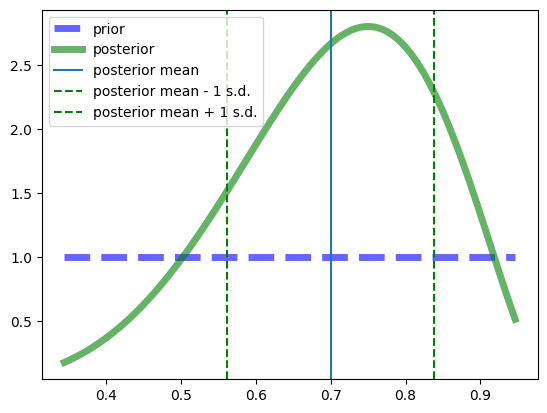

In [26]:
alpha = 7
beta = 3

posterior_mean, posterior_var, posterior_skew, posterior_kurt = scipy.stats.beta.stats(alpha, beta, moments = 'mvsk')

xs = np.linspace(scipy.stats.beta.ppf(0.01, alpha, beta), scipy.stats.beta.ppf(0.99, alpha, beta), 100)
plt.plot(xs, [1 for x in xs], 'b--', lw=5, alpha=.6, label='prior')
plt.plot(xs, scipy.stats.beta.pdf(xs, alpha, beta), 'g-', lw=5, alpha=.6, label='posterior')
plt.axvline(posterior_mean, label='posterior mean')
posterior_sd = np.sqrt(posterior_var)
plt.axvline(posterior_mean - posterior_sd, linestyle='--', color='g', label='posterior mean - 1 s.d.')
plt.axvline(posterior_mean + posterior_sd, linestyle='--', color='g', label='posterior mean + 1 s.d.')
plt.legend(loc='upper left');

print('posterior mean:', posterior_mean)
print('posterior s.d.:', posterior_sd)

You can notice above that the posterior is equal to the Maximum Likelihood estimator, $\hat{\theta}_{ML}$, $70\%$.

### Informative Prior

But, if we suppose that the coin is *unbiased*, i.e., the probability of *head* is equal to *tail*, which is $50\%$. To fix the parameter $\theta$ on $0.5$ we will consider $\alpha = 2$ and $\beta = 2$. The parameters of the posterior will be given by $\alpha_{posterior} = \alpha + \sum x_i$ and $\beta_{posterior} = \beta + n - \sum x_i$

posterior mean: 0.6428571428571429
posterior mean - s.d.: 0.5191392280307945
posterior s.d.: 0.12371791482634838
posterior mean + s.d.: 0.7665750576834913


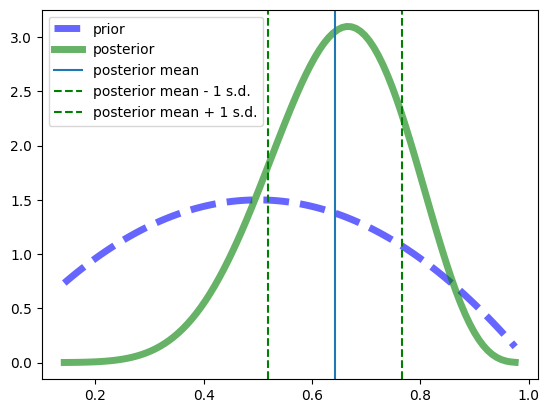

In [55]:
prior_alpha = 2 #prior alpha value
prior_beta = 2 #prior beta value

posterior_alpha = prior_alpha + 7
posterior_beta = prior_beta + 10 - 7

posterior_mean, posterior_var, posterior_skew, posterior_kurt = scipy.stats.beta.stats(posterior_alpha, posterior_beta, moments='mvsk')

xs = np.linspace(scipy.stats.beta.ppf(0.00001, posterior_alpha, posterior_beta),
                 scipy.stats.beta.ppf(0.99999, posterior_alpha, posterior_beta), 100)

plt.plot(xs, scipy.stats.beta.pdf(xs, prior_alpha, prior_beta), 'b--', lw=5, alpha=.6, label='prior')
plt.plot(xs, scipy.stats.beta.pdf(xs, posterior_alpha, posterior_beta), 'g-', lw=5, alpha=.6, label='posterior')
plt.axvline(posterior_mean, label='posterior mean')
posterior_sd = np.sqrt(posterior_var)
plt.axvline(posterior_mean - posterior_sd, linestyle='--', color='g', label='posterior mean - 1 s.d.')
plt.axvline(posterior_mean + posterior_sd, linestyle='--', color='g', label='posterior mean + 1 s.d.')
plt.legend(loc='upper left');
print('posterior mean:', posterior_mean)
print('posterior mean - s.d.:', posterior_mean - posterior_sd)
print('posterior s.d.:', posterior_sd)
print('posterior mean + s.d.:', posterior_mean + posterior_sd)

This posterior suggests that after observing $7$ heads in $10$ tosses, our best estimate for $\theta$ is $0.64$. However, there remains substantial uncertainty — most of the probability mass lies between roughly $0.51$ and $0.76$.

Moreover, the results of Bayesian estimation are, to varying degrees, sensitive to the choice of prior distribution, especially when data are scarce.

Let's repeat the exercise 10 times with the same values, i.e., we are going to flip the coin $10$ times again and consider that we have $7$ heads.

posterior mean: 0.6923076923076923
posterior mean - s.d.: 0.6472661504792985
posterior s.d.: 0.04504154182839384
posterior mean + s.d.: 0.7373492341360861


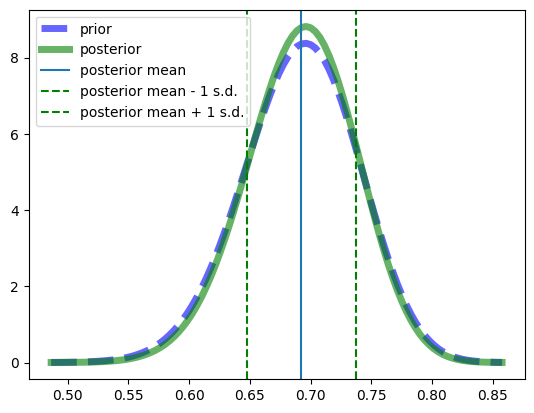

In [56]:
for i in range(1, 10):
    prior_alpha = posterior_alpha #prior alpha value = posterior alpha value of the last exercise
    prior_beta = posterior_beta #prior beta value = posterior beta value of the last exercise

    posterior_alpha = prior_alpha + 7
    posterior_beta = prior_beta + 10 - 7

posterior_mean, posterior_var, posterior_skew, posterior_kurt = scipy.stats.beta.stats(posterior_alpha, posterior_beta, moments='mvsk')

xs = np.linspace(scipy.stats.beta.ppf(0.00001, posterior_alpha, posterior_beta),
                 scipy.stats.beta.ppf(0.99999, posterior_alpha, posterior_beta), 100)

plt.plot(xs, scipy.stats.beta.pdf(xs, prior_alpha, prior_beta), 'b--', lw=5, alpha=.6, label='prior')
plt.plot(xs, scipy.stats.beta.pdf(xs, posterior_alpha, posterior_beta), 'g-', lw=5, alpha=.6, label='posterior')
plt.axvline(posterior_mean, label='posterior mean')
posterior_sd = np.sqrt(posterior_var)
plt.axvline(posterior_mean - posterior_sd, linestyle='--', color='g', label='posterior mean - 1 s.d.')
plt.axvline(posterior_mean + posterior_sd, linestyle='--', color='g', label='posterior mean + 1 s.d.')
plt.legend(loc='upper left');
print('posterior mean:', posterior_mean)
print('posterior mean - s.d.:', posterior_mean - posterior_sd)
print('posterior s.d.:', posterior_sd)
print('posterior mean + s.d.:', posterior_mean + posterior_sd)

In summary, the Frequentist approach provides a single point estimate $\hat{\theta}_{ML}$ with desirable statistical properties, whereas the Bayesian approach yields a full posterior distribution that integrates prior beliefs with observed evidence. As the sample size increases, the Bayesian posterior tends to concentrate around the Frequentist estimator, illustrating the deep connection between the two frameworks.